# Pandas DataFrame

+ Author: Alexandre Manhães Savio
+ Date: 08/Jun/2015
+ Reference: http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro

In [67]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

import numpy as np
import pandas as pd

## Column selection, addition, deletion

In [60]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
df

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


In [17]:
df['one']

a     1
b     2
c     3
d   NaN
Name: one, dtype: float64

In [18]:
df['three'] = df['one'] * df['two']
df

,one,two,three
a,1,1,1
b,2,2,4
c,3,3,9
d,NaN,4,NaN


In [19]:
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,1,1,1,False
b,2,2,4,False
c,3,3,9,True
d,NaN,4,NaN,False


Columns can be deleted or popped like with a dict:

In [20]:
del df['two']
df

,one,three,flag
a,1,1,False
b,2,4,False
c,3,9,True
d,NaN,NaN,False


In [21]:
# you can pop
three = df.pop('three')
df

,one,flag
a,1,False
b,2,False
c,3,True
d,NaN,False


In [22]:
# scalar values propagate
df['foo'] = 'bar'
df

,one,flag,foo
a,1,False,bar
b,2,False,bar
c,3,True,bar
d,NaN,False,bar


In [23]:
# truncated Series conform to df index
df['one_trunc'] = df['one'][:2]
df

,one,flag,foo,one_trunc
a,1,False,bar,1
b,2,False,bar,2
c,3,True,bar,NaN
d,NaN,False,bar,NaN


In [27]:
# By default, columns get inserted at the end. 
# The insert function is available to insert at a particular location in the columns:
df.insert(0, 'bar', df['one'])
df

,bar2,one,bar,flag,foo,one_trunc
a,1,1,1,False,bar,1
b,2,2,2,False,bar,2
c,3,3,3,True,bar,NaN
d,NaN,NaN,NaN,False,bar,NaN


## Create derived columns: `assign`

DataFrame has an `assign()` method that allows you to easily **create new columns that are potentially derived** from existing columns.

In [6]:
!head Pandas_data/iris.data

SepalLength,SepalWidth,PetalLength,PetalWidth,Name
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa


In [8]:
iris = pd.read_csv('Pandas_data/iris.data')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.assign(sepal_ratio = iris['SepalWidth'] / iris['SepalLength']).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [12]:
# assign() returns a copy of the data, leaving the original DataFrame untouched
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
dfm = iris.assign(sepal_ratio = lambda x: (x['SepalWidth'] / x['SepalLength'])).head()
dfm

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [45]:
# passing a callable is useful in chains of operations
(iris.query('SepalLength > 5')
     .assign(SepalRatio = lambda x: x.SepalWidth / x.SepalLength,
             PetalRatio = lambda x: x.PetalWidth / x.PetalLength)).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,PetalRatio,SepalRatio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.142857,0.686275
5,5.4,3.9,1.7,0.4,Iris-setosa,0.235294,0.722222
10,5.4,3.7,1.5,0.2,Iris-setosa,0.133333,0.685185
14,5.8,4.0,1.2,0.2,Iris-setosa,0.166667,0.689655
15,5.7,4.4,1.5,0.4,Iris-setosa,0.266667,0.771930


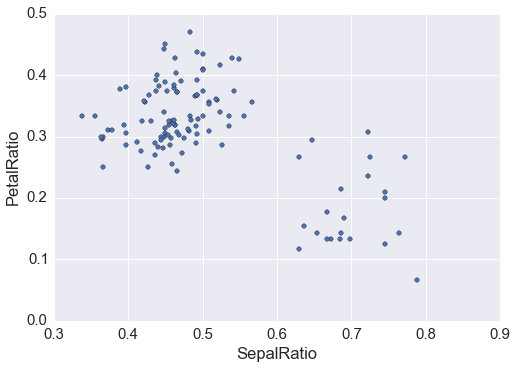

In [56]:
(iris.query('SepalLength > 5')
     .assign(SepalRatio = lambda x: x.SepalWidth / x.SepalLength,
             PetalRatio = lambda x: x.PetalWidth / x.PetalLength)
     .plot(kind='scatter', x='SepalRatio', y='PetalRatio'))

## Indexing / Selection

| **Operation**                   | **Syntax**      | **Result** |
|---                              |:---             |---         |
| Select column                   |   `df[col]`     |	Series  |
| Select row by label             | `df.loc[label]` |  Series    |
| Select row by integer location  | `df.iloc[loc]`  |  Series    |
| Slice rows                      | `df[5:10]`      |  DataFrame |
| Select rows by boolean vector   | `df[bool_vec]`  |  DataFrame |

In [61]:
df.loc['b']

one    2
two    2
Name: b, dtype: float64

In [62]:
df.iloc[2]

one    3
two    3
Name: c, dtype: float64

For a more exhaustive treatment of more sophisticated label-based indexing and slicing, see the [section on indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing).

For the fundamentals of reindexing / conforming to new sets of labels in the [section on reindexing](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-reindexing).

## Data alignment and arithmetic

Data alignment between DataFrame objects automatically align on **both the columns and the index (row labels)**. 

In [73]:
df  = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.051227,1.331067,-0.501811,-0.494388
1,-0.849889,-0.365619,0.810074,1.855589
2,-1.892579,0.111763,-0.828002,0.810159
3,-0.361333,-1.189730,1.059696,-1.869660
4,0.970661,-0.710134,0.352052,0.067289
5,0.064937,1.170688,-0.866624,0.681308
6,-0.582143,0.549825,0.059903,-0.689382
7,-0.344077,-0.155013,0.544994,-0.159944
8,1.383453,1.334258,-1.493779,-1.083337
9,-2.168786,-0.533299,1.424072,-1.454513


In [74]:
df2 = pd.DataFrame(np.random.randn( 7, 3), columns=['A', 'B', 'C'])
df2

,A,B,C
0,-0.824206,0.453738,0.422832
1,-1.095989,-0.301405,-1.245026
2,-0.057898,-0.337110,0.721535
3,-0.703579,-0.603614,-0.133005
4,-0.019410,-0.104041,1.066001
5,-0.745534,1.777894,0.855191
6,0.753878,-1.396579,0.316378


In [75]:
# the intersection of labels are used. the ones out are set to NaN
df + df2

,A,B,C,D
0,-1.875433,1.784805,-0.078979,NaN
1,-1.945878,-0.667024,-0.434952,NaN
2,-1.950477,-0.225348,-0.106467,NaN
3,-1.064913,-1.793343,0.926690,NaN
4,0.951250,-0.814175,1.418053,NaN
5,-0.680597,2.948582,-0.011433,NaN
6,0.171735,-0.846754,0.376282,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [80]:
# operating between DataFrame and Series: Series index is aligned with DataFrams columns
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.201338,-1.696686,1.311884,2.349977
2,-0.841352,-1.219304,-0.326191,1.304547
3,0.689894,-2.520797,1.561507,-1.375272
4,2.021888,-2.041201,0.853863,0.561677
5,1.116165,-0.160379,-0.364813,1.175696
6,0.469084,-0.781242,0.561714,-0.194994
7,0.707150,-1.486081,1.046805,0.334444
8,2.434680,0.003191,-0.991969,-0.588949
9,-1.117559,-1.864367,1.925883,-0.960124


### Columnwise operations

In [86]:
index = pd.date_range('1/1/2000', periods=8)
index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [89]:
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))
df

,A,B,C
2000-01-01,1.585784,-1.819249,-0.443700
2000-01-02,-1.031597,-1.263210,0.592504
2000-01-03,0.312738,1.696770,1.585032
2000-01-04,0.272383,-0.276856,-0.191226
2000-01-05,-1.277036,-1.442268,0.681336
2000-01-06,1.074439,0.030853,-0.945107
2000-01-07,0.286009,-2.049287,-1.486445
2000-01-08,0.464894,-1.240677,-0.252971


In [90]:
df.sub(df['A'], axis=0)

,A,B,C
2000-01-01,0,-3.405033,-2.029485
2000-01-02,0,-0.231613,1.624102
2000-01-03,0,1.384031,1.272294
2000-01-04,0,-0.549239,-0.463609
2000-01-05,0,-0.165232,1.958372
2000-01-06,0,-1.043586,-2.019546
2000-01-07,0,-2.335296,-1.772454
2000-01-08,0,-1.705571,-0.717865


### Operations with scalars are just as you would expect.

### Boolean operators work as well:

In [ ]:
df1 = DataFrame({'a' : [1, 0, 1], 'b' : [0, 1, 1] }, dtype=bool)
df2 = DataFrame({'a' : [0, 1, 1], 'b' : [1, 1, 0] }, dtype=bool)

## Main Features
Here are just a few of the things that pandas does well:

  - Easy handling of **missing data** (represented as
    `NaN`) in floating point as well as non-floating point data
  - Size mutability: columns can be **inserted and
    deleted** from DataFrame and higher dimensional
    objects
  - Automatic and explicit **data alignment**: objects can
    be explicitly aligned to a set of labels, or the user can simply
    ignore the labels and let `Series`, `DataFrame`, etc. automatically
    align the data for you in computations
  - Powerful, flexible **group by** functionality to perform
    split-apply-combine operations on data sets, for both aggregating
    and transforming data
  - Make it **easy to convert** ragged,
    differently-indexed data in other Python and NumPy data structures
    into DataFrame objects
  - Intelligent label-based **slicing**, **fancy indexing**, and **subsetting** of
    large data sets
  - Intuitive **merging** and **joining** data
    sets
  - Flexible **reshaping** and **pivoting** of
    data sets
  - **Hierarchical** labeling of axes (possible to have multiple
    labels per tick)
  - Robust IO tools for loading data from **flat files**
    (CSV and delimited), **Excel files**, **databases**,
    and saving/loading data from the ultrafast **HDF5 format**
  - **Time series**-specific functionality: date range
    generation and frequency conversion, moving window statistics,
    moving window linear regressions, date shifting and lagging, etc.